In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

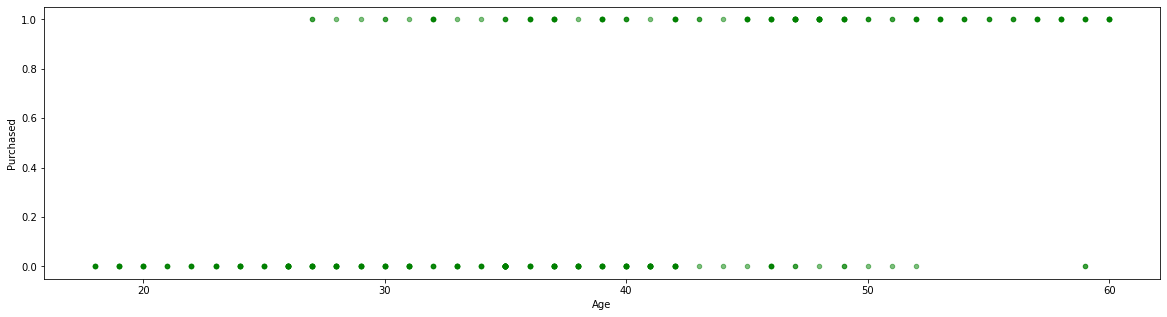

In [4]:
df.plot(kind ="scatter", x ="Age",y ="Purchased", color= "green",alpha= .5,figsize=(20,5))

In [5]:
X = df[["Age",'EstimatedSalary']]
y = df["Purchased"]
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest,ytrain,ytest = train_test_split(scaledX,y,test_size=.2,random_state=1)
xtrain.shape,xtest.shape


((320, 2), (80, 2))

In [6]:
xtrain.shape,xtest.shape

((320, 2), (80, 2))

In [7]:
m= KNeighborsClassifier()
m.fit(xtrain, ytrain)

KNeighborsClassifier()

In [8]:
m.score(xtest,ytest)

0.8625

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
ypred = m.predict(xtest)

In [11]:
import seaborn as sns

In [12]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[40  8]
 [ 3 29]]


<AxesSubplot:>

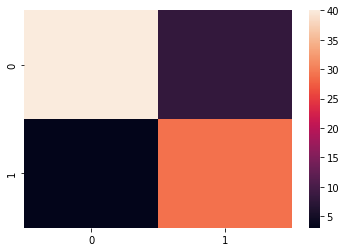

In [13]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm)

In [14]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.78      0.91      0.84        32

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



In [15]:
import seaborn as sns
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


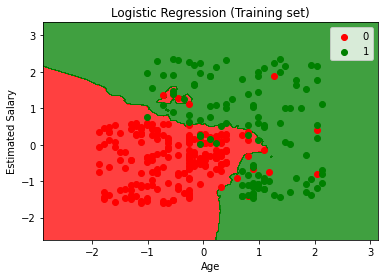

In [17]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = xtrain, ytrain
X1, X2 = np.meshgrid(np.arange(
                            start = X_set[:, 0].min() - 1, 
                            stop = X_set[:, 0].max() + 1, 
                            step = 0.01),
                        np.arange(
                            start = X_set[:, 1].min() - 1, 
                            stop = X_set[:, 1].max() + 1, 
                            step = 0.01)
                                )
plt.contourf(X1, X2, m.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('knn (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


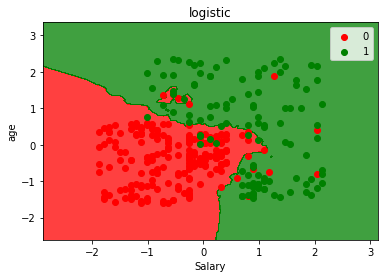

In [18]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"logistic",'Salary','age')